In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 📦 Paramètres
IMG_SIZE = 299  # Xception attend des images 299x299
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = './stanford_dogs/Images'  # Dossier contenant les sous-dossiers par race

# 🔄 Prétraitement des images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# 🧠 Chargement du modèle Xception sans la dernière couche
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# On gèle les couches du modèle pré-entraîné
base_model.trainable = False

# Ajout des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(
    inputs=base_model.input,
    outputs=predictions
    )

# Compilation
model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

# Entraînement
model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=EPOCHS
    )

# Sauvegarde du modèle
model.save('xception_dog_breed_classifier.h5')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\lea\Downloads\Refactoring Kata\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2576s 5s/step - accuracy: 0.8103 - loss: 0.7063 - val_accuracy: 0.8539 - val_loss: 0.4928
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4536s 9s/step - accuracy: 0.8726 - loss: 0.3897 - val_accuracy: 0.8524 - val_loss: 0.4905
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2039s 4s/step - accuracy: 0.8911 - loss: 0.3270 - val_accuracy: 0.8681 - val_loss: 0.4335
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1419s 3s/step - accuracy: 0.9050 - loss: 0.2841 - val_accuracy: 0.8708 - val_loss: 0.4669
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - accuracy: 0.9110 - loss: 0.2611 - val_accuracy: 0.8551 - val_loss: 0.4983
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1176s 2s/step - accuracy: 0.9197 - loss: 0.2268 - val_accuracy: 0.8644 - val_loss: 0.4891
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3142s 6s/step - accuracy: 0.9265 - loss: 0.2017 - val_accuracy: 0.8585 - val_loss: 0.5414
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1372s 3s/step - accuracy: 0.9325 - loss: 0.1930 - 

In [2]:
import numpy as np
loss, accuracy = model.evaluate(val_generator)
print(f"Accuracy: {accuracy:.2%}")
print(f"Loss: {loss:.4f}")
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())
    


128/128 ━━━━━━━━━━━━━━━━━━━━ 800s 6s/step - accuracy: 0.8649 - loss: 0.5732
Accuracy: 86.49%
Loss: 0.5732
128/128 ━━━━━━━━━━━━━━━━━━━━ 769s 6s/step


In [6]:
import os
classes = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print(
    f"Classes found: {classes}, Total: {len(classes)}"
)

Classes found: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1149s 2s/step - accuracy: 0.9453 - loss: 0.1518 - val_accuracy: 0.8588 - val_loss: 0.6177
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1180s 2s/step - accuracy: 0.9521 - loss: 0.1321 - val_accuracy: 0.8635 - val_loss: 0.6017
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2685s 5s/step - accuracy: 0.9546 - loss: 0.1336 - val_accuracy: 0.8610 - val_loss: 0.6205
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2890s 6s/step - accuracy: 0.9553 - loss: 0.1236 - val_accuracy: 0.8541 - val_loss: 0.6512
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1369s 3s/step - accuracy: 0.9623 - loss: 0.1049 - val_accuracy: 0.8544 - val_loss: 0.6763
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1344s 3s/step - accuracy: 0.9618 - loss: 0.1102 - val_accuracy: 0.8605 - val_loss: 0.6437
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1358s 3s/step - accuracy: 0.9646 - loss: 0.1021 - val_accuracy: 0.8627 - val_loss: 0.6505
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1447s 3s/step - accuracy: 0.9657 - loss: 0.0973 - 

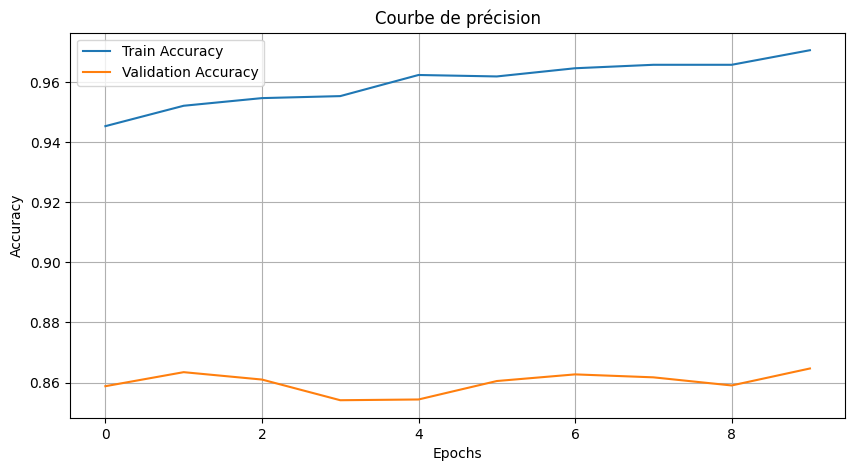

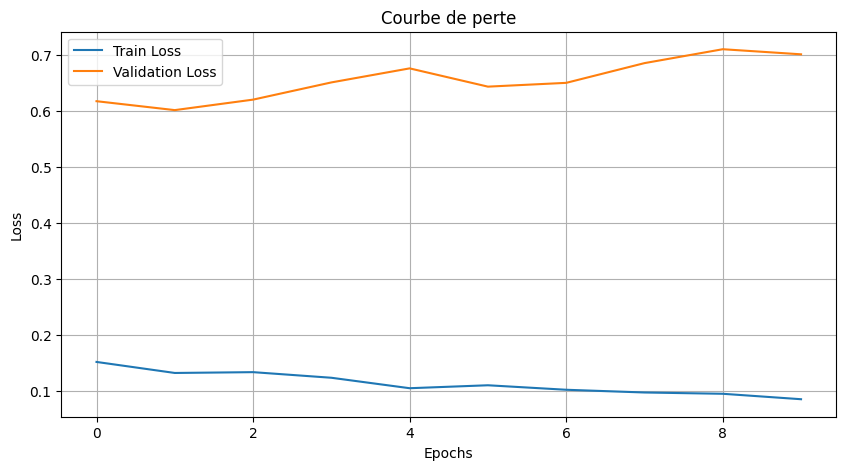

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
import matplotlib.pyplot as plt

# 🔵 Courbe de précision
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 🔴 Courbe de perte
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
